<a href="https://colab.research.google.com/github/jumbokh/Computer-Vision/blob/main/notebooks/Keras_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div id="1.1" style="height:40px;width:1000px;opacity:0.8;display:inline-block;background-color:rgba(30,144,255,0.5);"><h1>Summary</h1>

Keras is a high-level neural networks API, written in Python and capable of running on top of either TensorFlow or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

If you’ve used scikit-learn then you should be on familiar ground as the library was developed with a similar philosophy.

- Can use either theano or tensorflow as a back-end. For the most part, you just need to set it up and then interact with it using keras. Ordering of dimensions can be different though.
- Models can be instantiated using the Sequential() class.
- Neural networks are built up from bottom layer to top using the add() method.
- Lots of recipes to follow and many examples for problems in natural language processing and image classification.

To install, just use commands like:

    pip install --user tensorflow
    pip install --user keras

<div id="1.1" style="height:40px;width:1000px;opacity:0.8;display:inline-block;background-color:rgba(30,144,255,0.5);"><h1>(2) Introduction to Keras</h1>

Keras is an open source neural network library written in Python. It is capable of running on top of Deeplearning4j, Tensorflow or Theano.  It is designed to enable fast experimentation with deep neural networks, focusing on being minimal, modular and extensible. It was developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System),and its primary author and maintainer is François Chollet, a Google engineer (taken from Wikipedia)


In [ ]:
import theano
from theano import tensor
a = tensor.dscalar()
b = tensor.dscalar()
c = a + b
f = theano.function([a,b], c)
result = f(1.5, 2.5)
print(result)



### (2.2) Sidetrack:TensorFlow ###

TensorFlow is a Python library for fast numerical computing created and released by Google.  It is Google Brain's second generation machine learning system, released as open source software on November 9, 2015. While the reference implementation runs on single devices, TensorFlow can run on multiple CPUs and GPUs (with optional CUDA extensions for general-purpose computing on graphics processing units).  TensorFlow is available on 64-bit Linux, macOS, and mobile computing platforms including Android and iOS (taken from Wikipedia).  Check out https://www.tensorflow.org/ for documentation and downloads for TensorFlow.

TensorFlow computations are expressed as stateful dataflow graphs. The name TensorFlow derives from the operations which such neural networks perform on multidimensional data arrays. These multidimensional arrays are referred to as "tensors".  Computation is described in terms of data flow and operations in the structure of a directed graph.

- Nodes: Nodes perform computation and have zero or more inputs and outputs. Data that moves between nodes are known as tensors, which are multi-dimensional arrays of real values.
- Edges: The graph defines the flow of data, branching, looping and updates to state. Special edges can be used to synchronize behavior within the graph, for example waiting for computation on a number of inputs to complete.
- Operations: An operation is a named abstract computation which can take input attributes and produce output attributes. For example, you could define an add or multiply operation.

Let's take a look at a TensorFlow program:

In [ ]:
import tensorflow as tf
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
add = tf.add(a,b)
session = tf.Session()
c = session.run(add, feed_dict={a: 1.5, b: 2.5})
print(c)

4.0


Looks a bit scary?  Well, this is where Keras comes in with its simple syntax.  Go to https://keras.io/ for documentation and downloads, so you can install Keras.


### (2.3) What is Keras? ###

The focus of Keras is the idea of a model. The main type of model is a sequence of layers called a Sequential which is a linear stack of layers. You create a Sequential and add layers to it in the order that you wish for the computation to be performed. Once defined, you compile the model which makes use of the underlying framework to optimize the computation to be performed by your model. In this you can specify the loss function and the optimizer to be used.
Once compiled, the model must be fit to data. This can be done one batch of data at a time or by firing off the entire model training regime. This is where all the compute happens. Once trained, you can use your model to make predictions on new data. We can summarize the construction of deep learning models in Keras as follows:

1. Define your model. Create a Sequential model and add configured layers.
2. Compile your model. Specify loss function and optimizers and call the *compile()*
function on the model.
3. Fit your model. Train the model on a sample of data by calling the *fit()* function on the model.
4. Make predictions. Use the model to generate predictions on new data by calling functions such as *evaluate()* or *predict()* on the model.

<div id="1.1" style="height:40px;width:1000px;opacity:0.8;display:inline-block;background-color:rgba(30,144,255,0.5);"><h1>(3) Keras Example</h1>

In this example (from https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/), we are going to use the Pima Indians onset of diabetes dataset. This is a standard machine learning dataset from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years. As such, it is a binary classification problem (onset of diabetes as 1 or not as 0). All of the input variables that describe each patient are numerical:

1. Number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skin fold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index.
7. Diabetes pedigree function.
8. Age (years).
9. Class, onset of diabetes within five years.

The data are already numerical, so it makes it easy to use the dataset directly with neural networks that expect numerical input and output values, and ideal for our first neural network in Keras.

Before the next step in the notebook, download the Pima Indian dataset from the UCI Machine Learning repository and place it in your local working directory, the same as your python file (this Jupyter notebook). Save it with the file name: pima-indians-diabetes.csv.  You will also find a copy of this file in our Google Drive folder for Keras.

You can now load the file directly using the NumPy function loadtxt(). There are eight input variables and one output variable (the last column). Once loaded we can split the dataset into input variables (X) and the output class variable (Y).

In [ ]:

! pip install pydrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1nF3h_IoeUpweV7-LGxd9dIfPkV89rf8q'
downloaded = drive.CreateFile({'id': file_id})
# allows you to temporarily load your file in the notebook VM

# assume the file is called file.csv and it's located at the root of your drive
downloaded.GetContentFile('pima-indians-diabetes.csv')

In [ ]:
import numpy as np
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [ ]:
dataset[1,:]

array([ 1.   , 85.   , 66.   , 29.   ,  0.   , 26.6  ,  0.351, 31.   ,
        0.   ])

Models in Keras are defined as a sequence of layers. We create a Sequential model and add layers one at a time until we are happy with our network topology. The first thing to get right is to ensure the input layer has the right number of inputs. This can be specified when creating the first layer with the input dim argument and setting it to 8 for the 8 input variables.

Fully connected layers are defined using the Dense class. We can specify the number of neurons in the layer as the first argument, the initialization method as the second argument as init and specify the activation function using the activation argument. In this case we initialize the network weights to a small random number generated from a
uniform distribution, in this case between 0 and 0.05 because that is the default uniform weight initialization in Keras.

We will use the rectifier (relu) activation function on the first two layers and the sigmoid activation function in the output layer. See https://en.wikipedia.org/wiki/Rectifier_(neural_networks) to learn more.

So, the first hidden layer has 12 neurons and expects 8 input variables. The second hidden layer has 8 neurons and finally the output layer has 1 neuron to predict the class
(onset of diabetes or not).

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Now that the model is defined, we can compile it.  This is where the "translation" happens for Theano or Tensorflow, and you don't need to worry how it is implemented in these "backend" systems.  Nice!

We're definining pretty standard loss functions (how you measure the "goodness of fit"), I am using Simple Gradient Descent (SGD) as the optimiser, and I want to report accuracy as we optimize

In [ ]:
  model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

Want to know more about the loss function?  Well, take a look at the following:

https://stats.stackexchange.com/questions/260505/machine-learning-should-i-use-a-categorical-cross-entropy-or-binary-cross-entro#260537

..and you'll see why we're not covering it in this talk.

Now we are ready to train our model.  We'll run 20 times over the training dataset (20 "epochs") and we will update the weights inside the neural network not with every training example, but instead in batches of 10.  Batches like this make for more stable optimisations, as they average out "strange" training points with more "normal" ones.  If you don't want to see the output for each epoch,  put "verbose=0" in the command.

In [ ]:
model.fit(X, Y, epochs=20, batch_size=10)

Epoch 1/20
768/768 [==============================] - 0s 255us/step - loss: 10.3792 - acc: 0.3490
Epoch 2/20
768/768 [==============================] - 0s 124us/step - loss: 10.3792 - acc: 0.3490
Epoch 3/20
768/768 [==============================] - 0s 117us/step - loss: 10.3792 - acc: 0.3490
Epoch 4/20
768/768 [==============================] - 0s 112us/step - loss: 10.3792 - acc: 0.3490
Epoch 5/20
768/768 [==============================] - 0s 128us/step - loss: 10.3792 - acc: 0.3490
Epoch 6/20
768/768 [==============================] - 0s 115us/step - loss: 10.3792 - acc: 0.3490
Epoch 7/20
768/768 [==============================] - 0s 116us/step - loss: 10.3792 - acc: 0.3490
Epoch 8/20
768/768 [==============================] - 0s 126us/step - loss: 10.3792 - acc: 0.3490
Epoch 9/20
768/768 [==============================] - 0s 114us/step - loss: 10.3792 - acc: 0.3490
Epoch 10/20
768/768 [==============================] - 0s 125us/step - loss: 10.3792 - acc: 0.3490
Epoch 11/20
768/768

Normally we'd split the data set up into training and testing. Here we didn't, as this was just our first go at a neural network.  Depending on your run, you will end up with different accuracies each time for this example.  

In [ ]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 62us/step

acc: 34.90%


OK, let's redo this and build training/testing data sets (note that I do not need to rebuild the model, but I am going to so we can see the learning process in the charts below!).  Note also how I switch the history on:

In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import History
history = History()

model_new = Sequential()
model_new.add(Dense(12, input_dim=8, activation='relu'))
model_new.add(Dense(8, activation='relu'))
model_new.add(Dense(1, activation='sigmoid'))
model_new.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
model_new.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=30, batch_size=10, verbose=0, callbacks=[history])
scores = model_new.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model_new.metrics_names[1], scores[1]*100))

acc: 60.39%


The accuracy you find on the test set should be a little worse than the one we calculated before when we used all the data for training (and evaluation).

In [ ]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


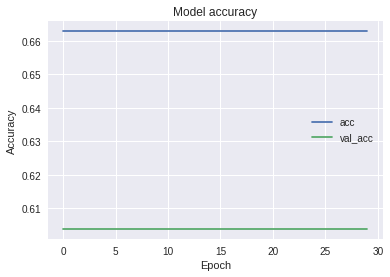

In [ ]:
%matplotlib inline
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history["acc"], label='acc')
plt.plot(history.history["val_acc"], label='val_acc')
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

<div id="1.1" style="height:40px;width:1000px;opacity:0.8;display:inline-block;background-color:rgba(30,144,255,0.5);"><h1>(4) Another Keras Example</h1>

Here is another example, taken from https://sempwn.github.io/blog/2017/03/24/keras_basic_intro

The data have a binary class (0 or 1), with two input dimensions x and y and is visualized above. In order to correctly classify the data the neural network will need to successfully separate out the zig-zag shape that intersects where the two classes meet.

Populating the interactive namespace from numpy and matplotlib


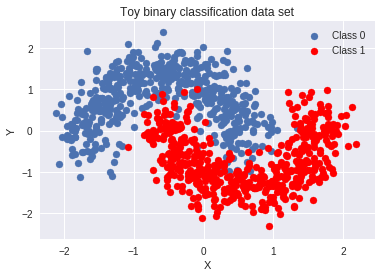

In [ ]:
%pylab inline
from sklearn.datasets import make_moons
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)
fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set');

We’ll create a simple multi-layer perceptron with one hidden layer. This is done in Keras by first defining a Sequential class object. Layers are then added from the initial layer, which includes the data, hence we need to specify the number of input dimensions using the keyword input_dim. We also define the activation of this layer to be a rectified linear unit or relu. Finally a densely connected layer is added with one output and a sigmoid activation corresponding to the binary class

In [ ]:
from keras.models import Sequential # Just incase you run from this cell and not using the previous example
from keras.layers import Dense
from keras.callbacks import History

model = Sequential()
model.add(Dense(32, input_dim=2,activation='relu')) #X,Y input dimensions. connecting to 32 neurons with relu activation
model.add(Dense(1, activation='sigmoid')) #binary classification so one output
model.compile(optimizer='AdaDelta', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = History()
model.reset_states()
model.fit(X_train, Y_train, batch_size=32, epochs=200, verbose=0, validation_data=(X_test, Y_test), callbacks=[history])

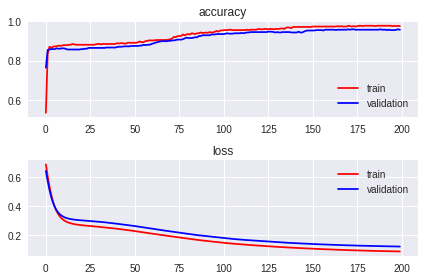

In [ ]:
# plot loss function
plt.subplot(211)
plt.title("accuracy")
plt.plot(history.history["acc"], color="r", label="train")
plt.plot(history.history["val_acc"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

We can create a grid of (x,y) values and then predict the class probability on each of these values using our fitted model. We’ll then plot the original data with the underlying probabilities to see what the classification looks like and how it compares to the data

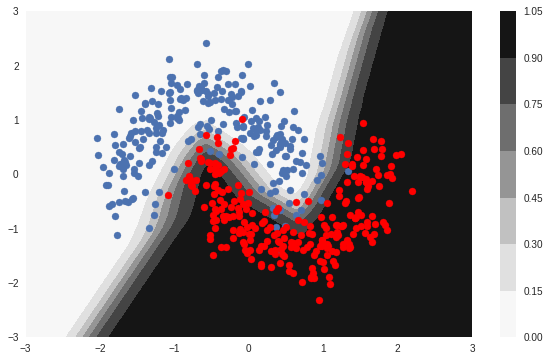

In [ ]:
grid = np.mgrid[-3:3:100j,-3:3:100j]
grid_2d = grid.reshape(2, -1).T
X, Y = grid
prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(X, Y, prediction_probs.reshape(100, 100))
ax.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1])
ax.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)

Not too shabby!

<div id="1.1" style="height:40px;width:1000px;opacity:0.8;display:inline-block;background-color:rgba(30,144,255,0.5);"><h1>(6) Next Steps</h1>

To experiment more, load the MNIST database of handwritten digits and see if you can beat a standard scikit-learn classifier.  Try it yourself first, but if you get stuck, take a look at [this notebook](https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb).

Technical and engineering tutorials for your favourite language or library are easy to find, but if you're interested in some of the more conceptual and mathematical background, take a look at:
 - Introduction to CNN ["http://cs231n.github.io/convolutional-networks/"]
 - Michael Nielsen's online textbook "[Neural Networks and Deep Learning]
 (http://neuralnetworksanddeeplearning.com/)" (especially chapters 1, 2 and 3)
 - Weeks 4 and 5 of Andrew Ng's Coursera course "[Machine Learning](https://www.coursera.org/learn/machine-learning)" (you'll have to sign up for the course to access these materials)
 - "[Deep Learning](http://www.nature.com/nature/journal/v521/n7553/abs/nature14539.html)" by Yan Le Cun et al. in Nature (2015) (you can find a [PDF of this article on Google Scholar](https://scholar.google.com/scholar?cluster=5362332738201102290))
 - Chris Olah's [wonderful essays](http://colah.github.io/), particularly the ones on [back propagation](http://colah.github.io/posts/2015-08-Backprop/) (the algorithm with which neural networks are trained) and [recurrent neural networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).


Speaking of recurrent neural networks, Keras also has layers that allow you to build models with:

 - convolutional layers, which give state-of-the-art results for computer vsion problems;
 - recurrent layers, which are particularly well suited to modelling language and other sequence data.

In fact, one key strength of neural networks (along with sheer predictive power) is their composability. Using a high-level library like Keras, it takes only a few seconds of work to create a very different network. Models can be built up like Lego. Have fun!
